# Time Series Analysis

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [28]:
data = pd.read_csv('C:\\Users\\user\\Desktop\\Air_Passengers_Time-Series-Forecasting\\AirPassengers.csv')

In [30]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [32]:
# 1. Check actual column names
print("Original column names:", data.columns.tolist())

# 2. Remove any hidden spaces or invisible characters
data.columns = data.columns.str.strip()

# 3. Recheck after stripping
print("Stripped column names:", data.columns.tolist())

# 4. Rename columns safely using existing names
data.rename(columns={
    data.columns[0]: 'Date',
    data.columns[1]: 'Number of Passengers'
}, inplace=True)

# 5. Check if renaming worked
print("Renamed column names:", data.columns.tolist())

# 6. Now apply datetime conversion and set index
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')


Original column names: ['Month', '#Passengers']
Stripped column names: ['Month', '#Passengers']
Renamed column names: ['Date', 'Number of Passengers']


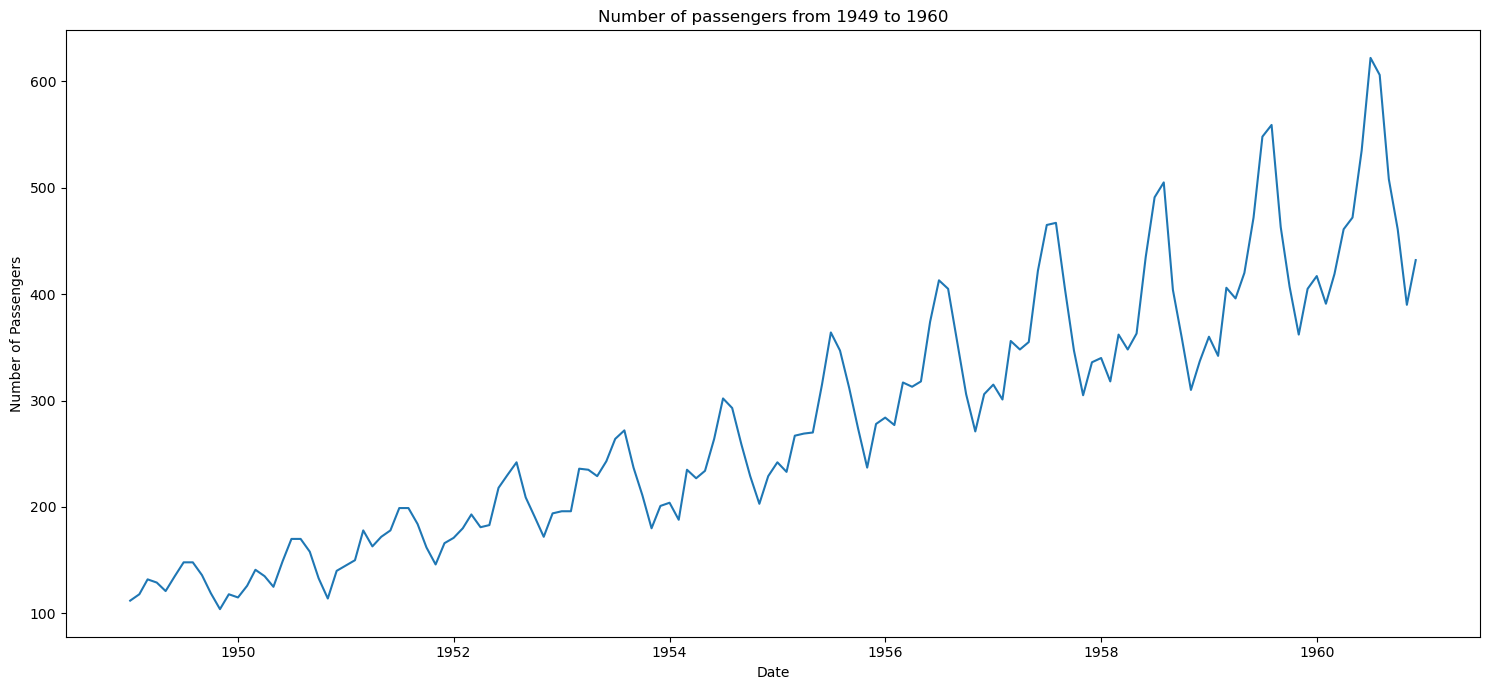

In [40]:
fig=plt.figure(figsize=(15,7))
sns.lineplot(data=data,x='Date',y='Number of Passengers')

plt.title("Number of passengers from 1949 to 1960")
plt.tight_layout()
plt.show()

#### <span style='color: yellow'> This plot has a non-costant mean and variance, and a seasonal component </span>
#### Let's decompose the series and then apply the stationarity tests (from here we can already see that the Series is non-stationary

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

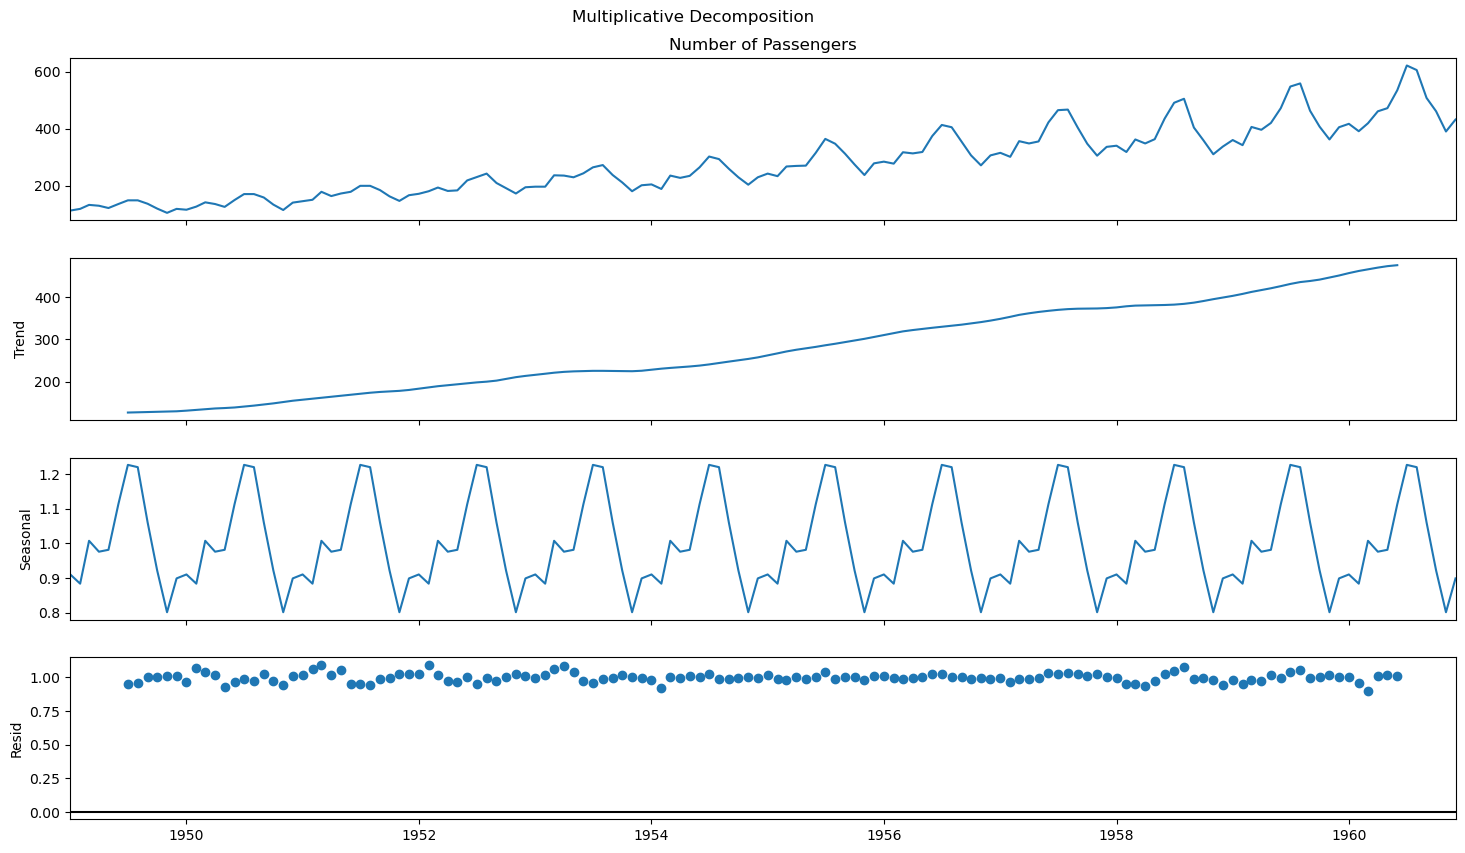

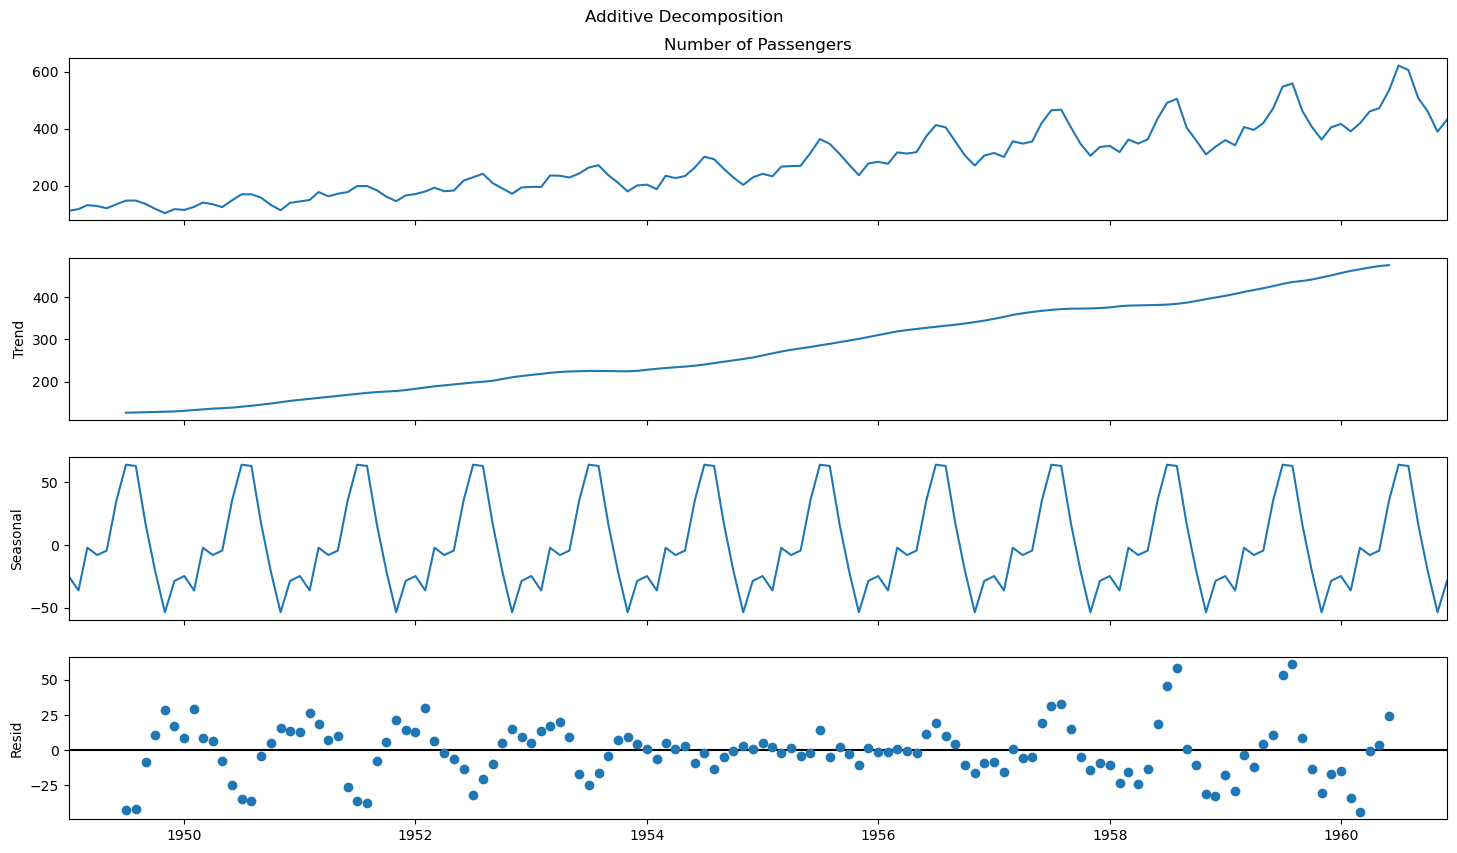

In [49]:
period=12

multiplicative_decomposition = seasonal_decompose(data['Number of Passengers'],model='multiplicative',period=period)
additive_decomposition = seasonal_decompose(data['Number of Passengers'],model='additive',period=period)

fig1= multiplicative_decomposition.plot()
fig1.suptitle("Multiplicative Decomposition")
fig1.set_size_inches((16,9))

fig2= additive_decomposition.plot()
fig2.suptitle("Additive Decomposition")
fig2.set_size_inches((16,9))

plt.show()

#### <span style='color: yellow'> This plot has a non-constant mean and variance, and a seasonal component </span>
#### Let's decompose the series and then apply the stationarity tests ( from here we can already see that the series is non-stationary )

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

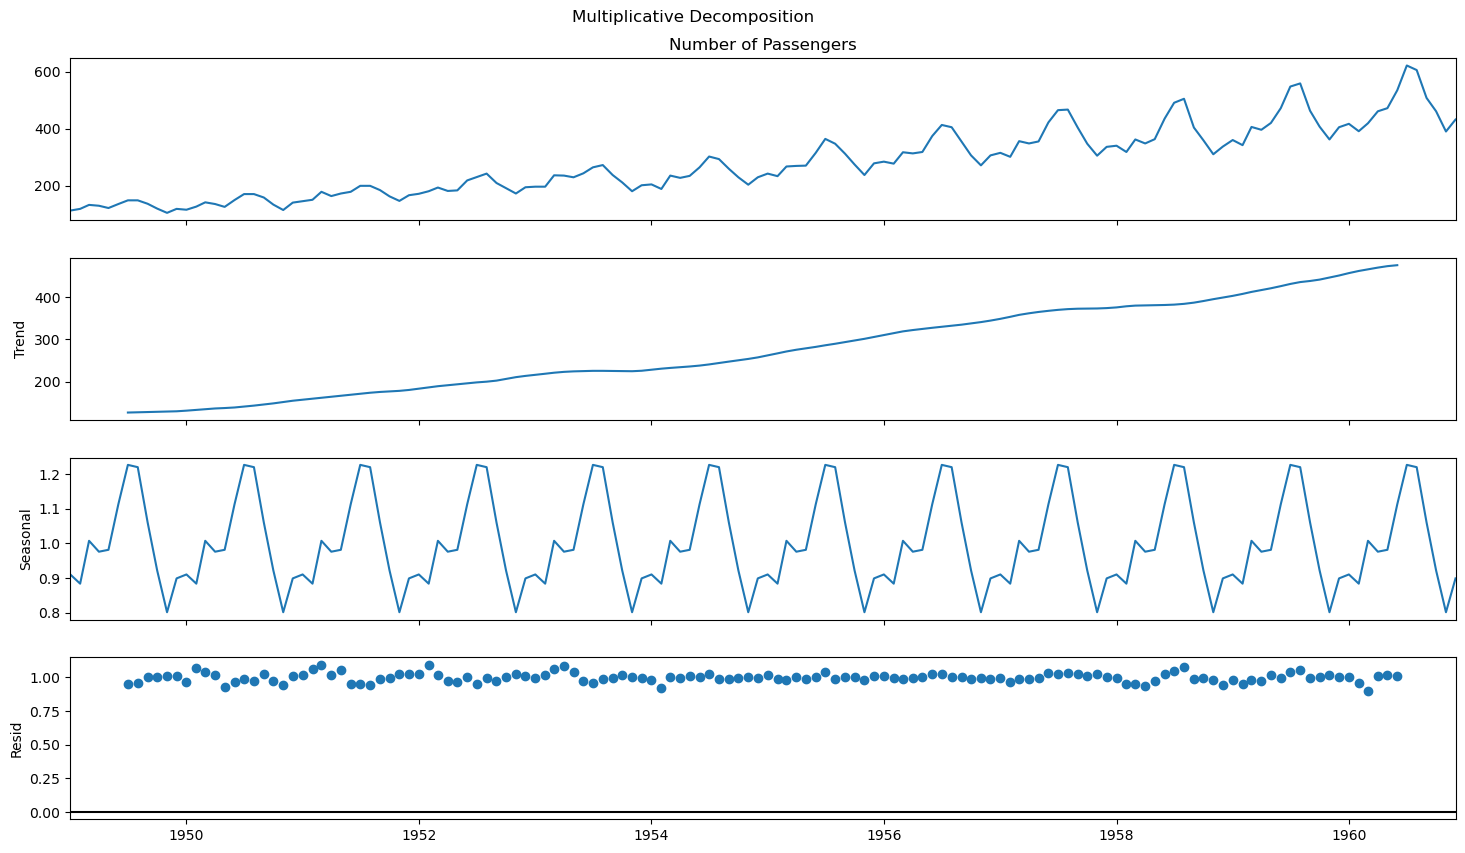

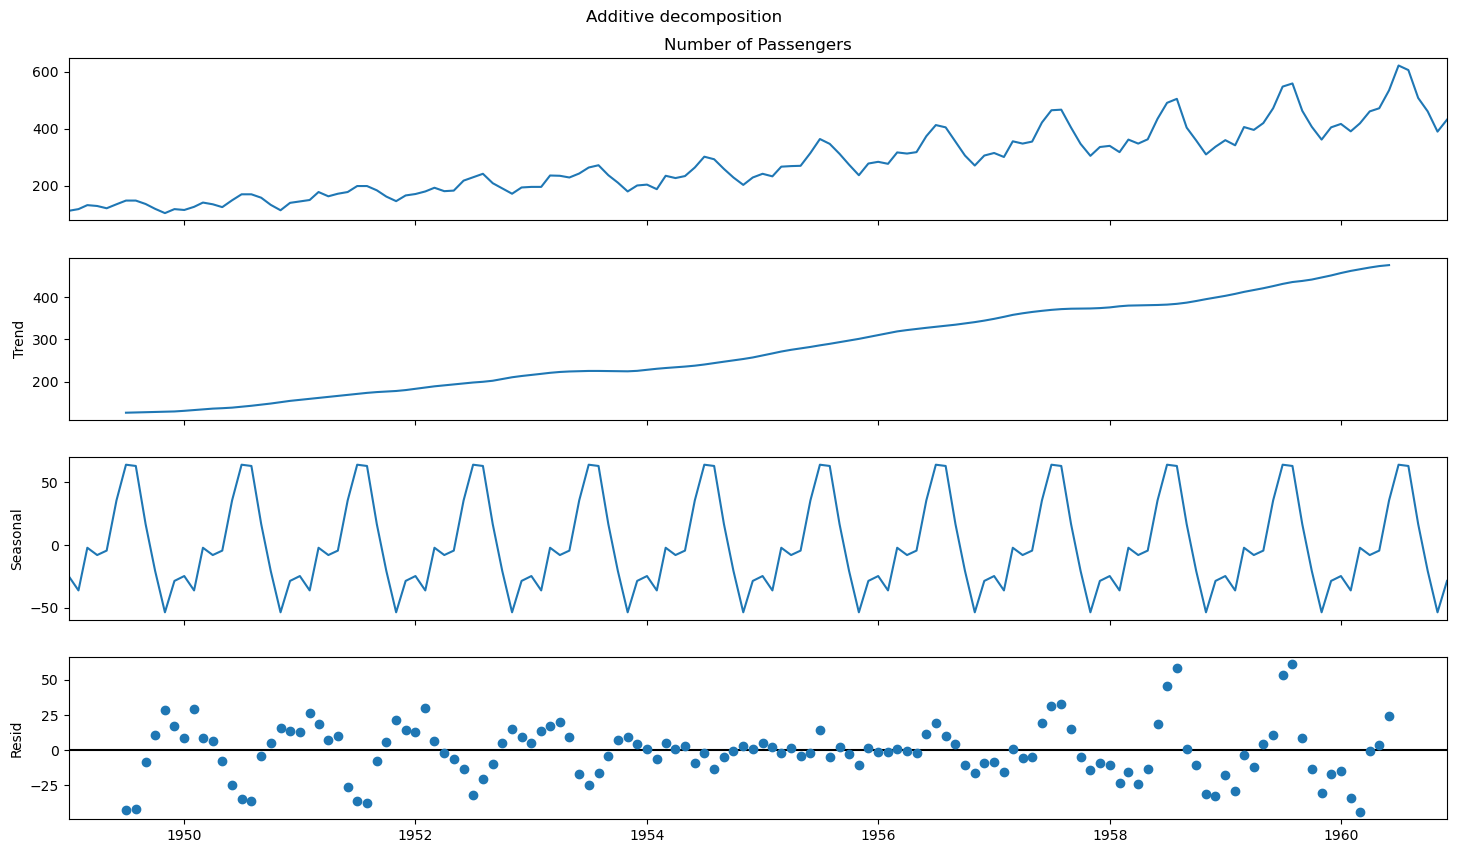

In [55]:
period=12

multiplicative_decomposition = seasonal_decompose(data['Number of Passengers'],model='multiplicative',period=period)
additive_decomposition = seasonal_decompose(data['Number of Passengers'],model='additive',period=period)

fig1=multiplicative_decomposition.plot()
fig1.suptitle('Multiplicative Decomposition')
fig1.set_size_inches((16,9))

fig2 = additive_decomposition.plot()
fig2.suptitle('Additive decomposition')
fig2.set_size_inches((16,9))

plt.show()

### Stationarity

####  <span style='color: yellow'> We have already seen from the graph that the series is NOT stationary, but we will do some tests just as a demonstration </span>

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for stationarity

#### Null Hyp (h0) - Series is stationary
#### Alternate Hyp (h1) - Series is not stationary

In [64]:
from statsmodels.tsa.stattools import kpss, adfuller

kpss_stat,p_value,lags,crit = kpss(data['Number of Passengers'])

print("*" * 40, "Test","*" * 40, "\n")

print(f'KPSS:{kpss_stat},\n p_value: {p_value},\n lags: {lags},\n crit:{crit}')

print("\n","*" * 90,"\n")

if p_value <0.05:
    print('The series is stationary')
else:
    print("The series is not stationary")

**************************************** Test **************************************** 

KPSS:1.6513122354165206,
 p_value: 0.01,
 lags: 8,
 crit:{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

 ****************************************************************************************** 

The series is stationary


### Adfuller Test

#### Null Hyp (h0) -Series posesses a unit root (random walk) and hence is not stationary
#### Alternate (h1) - Series is stationary

In [68]:
adff_stat, adff_pvalue, adff_lags,nobs,adff_crit,icbest = adfuller(data['Number of Passengers'])

print("*" * 40,"Test","*" *40, "\n")

print(f" ADFF: {adff_stat},\n p_value: {adff_pvalue},\n lags: {adff_lags},\n nobs: {nobs},\n critical values: {adff_crit},\n icbest: {icbest}")

print('\n',"*" * 90, "\n")

if adff_pvalue >0.05:
    print("The series is NOT stationary")
else:
    print('The series is Stationary')

## !!! ... AND ADFF (test statistic) > critical values at each threshold !!!

**************************************** Test **************************************** 

 ADFF: 0.8153688792060597,
 p_value: 0.9918802434376411,
 lags: 13,
 nobs: 130,
 critical values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598},
 icbest: 996.692930839019

 ****************************************************************************************** 

The series is NOT stationary


# Stationarity Transformation

In [71]:
log_ts = np.log(data)
differentiated_series = log_ts.diff().dropna()
differentiated_series

,Number of Passengers
Date,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


<Figure size 2000x600 with 0 Axes>

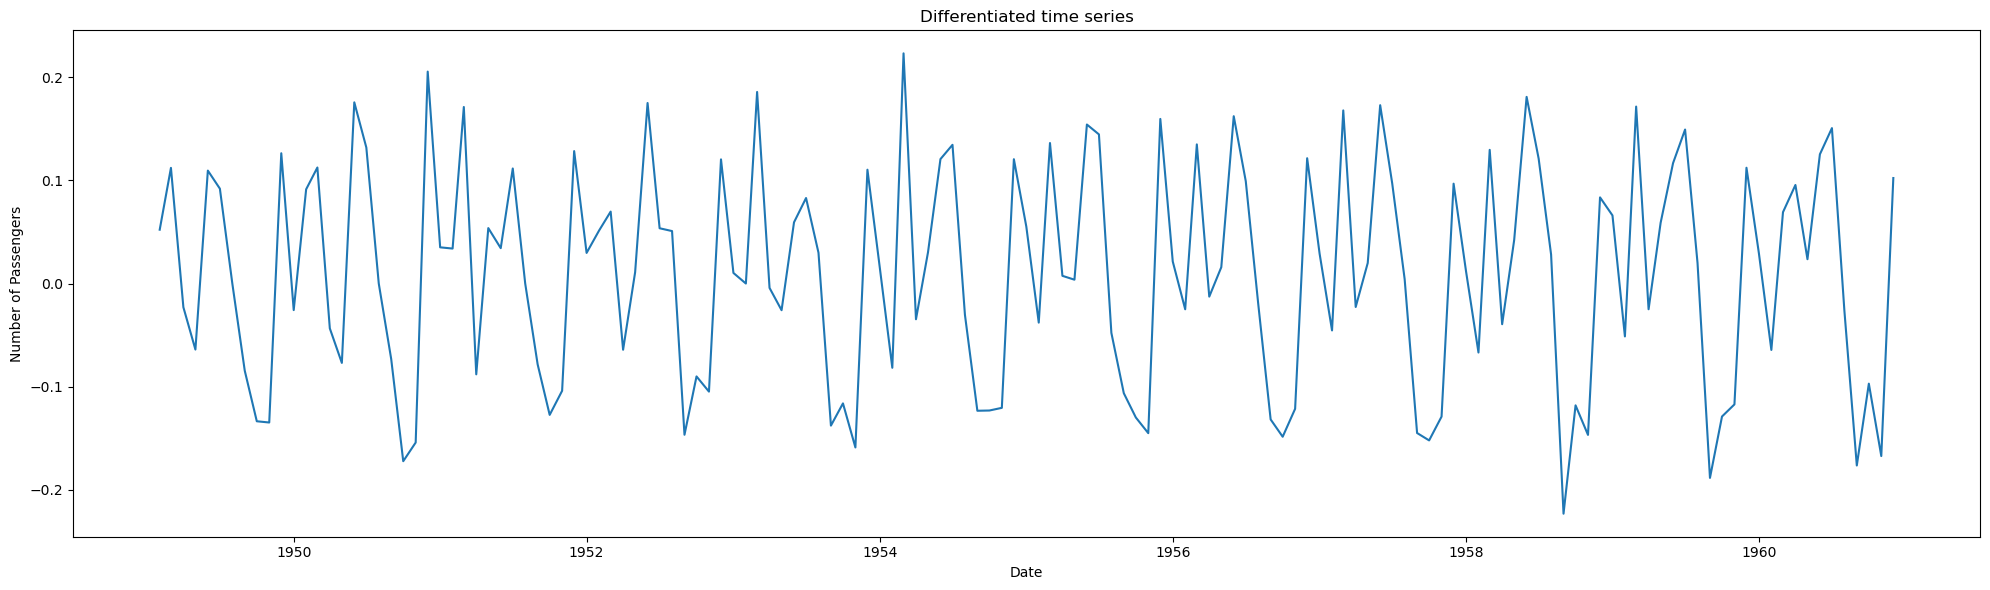

In [75]:
fig = plt.figure(figsize=(20,6))
sns.lineplot(data=differentiated_series, x='Date', y='Number of Passengers')

plt.title("Differentiated time series")
plt.tight_layout()
plt.show()

# ACF/PACF

In [80]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

### Before Differencing

<Figure size 2000x1000 with 0 Axes>

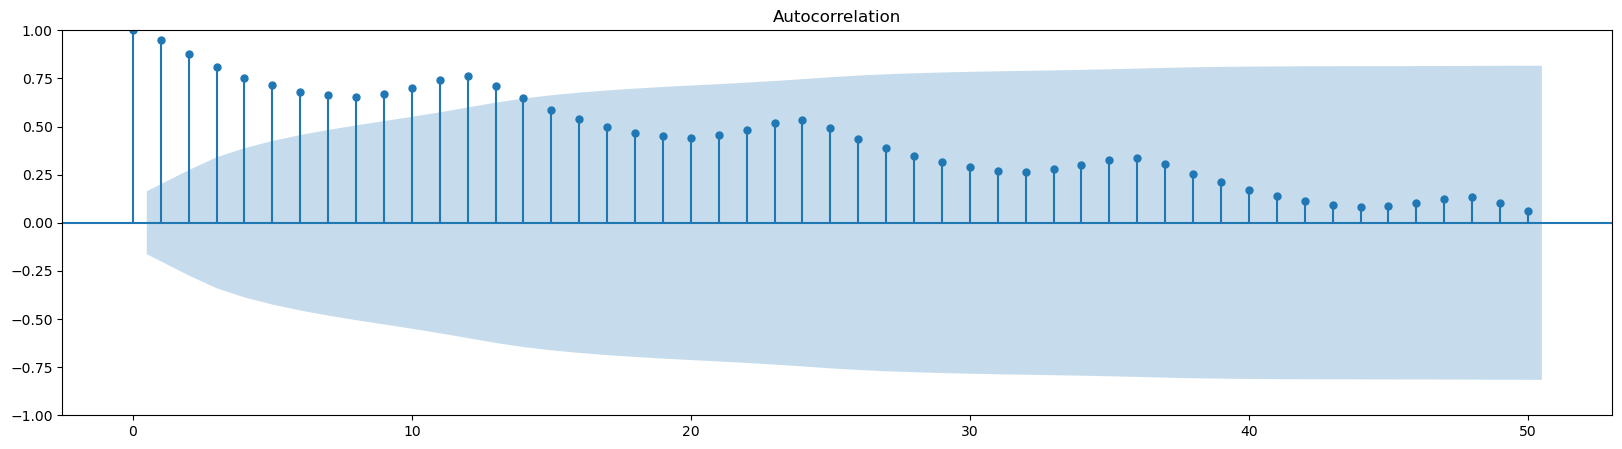

<Figure size 2000x1000 with 0 Axes>

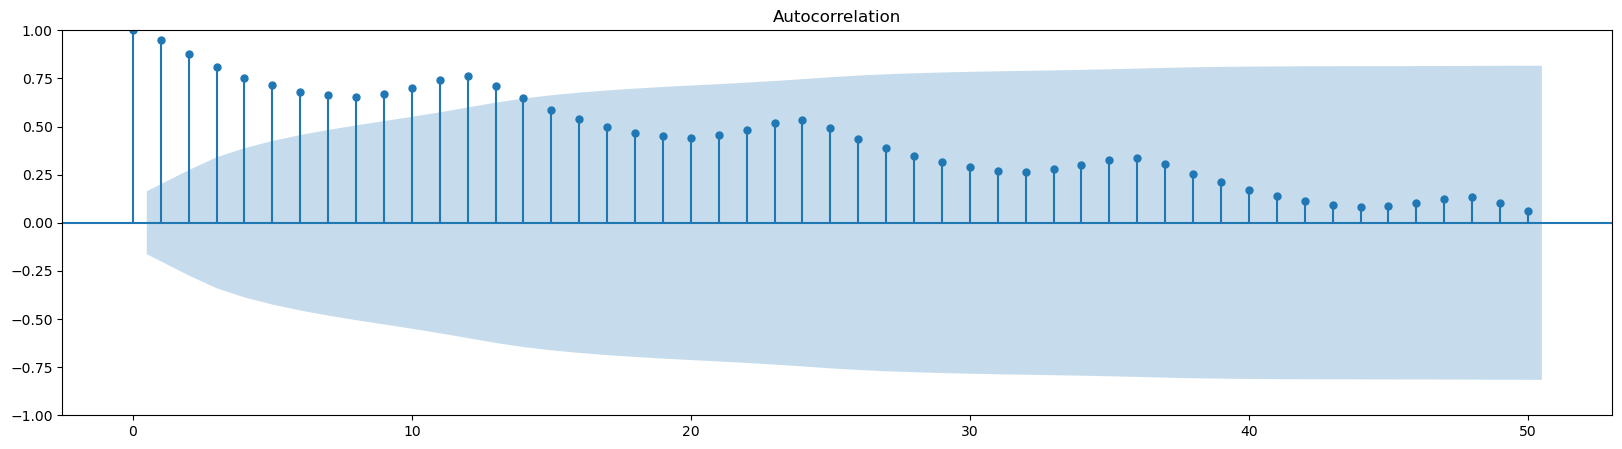

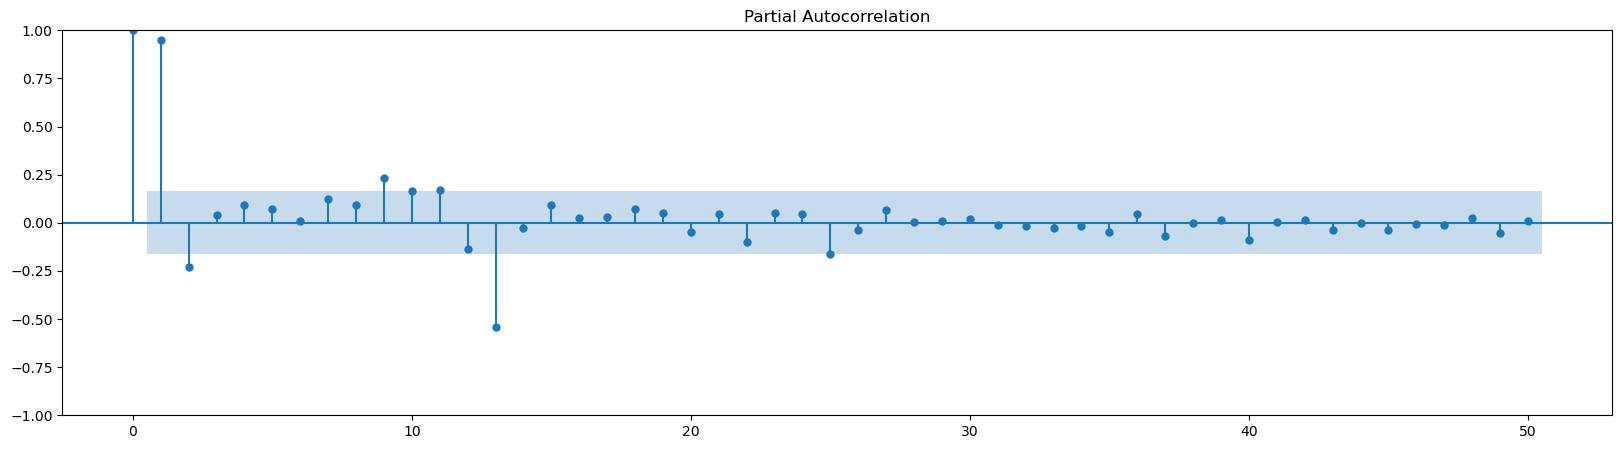

In [85]:
fig = plt.figure(figsize=(20,10))

acf= plot_acf(data['Number of Passengers'],alpha=0.05,lags=50)
acf.set_size_inches((20,5))
pacf=plot_pacf(data['Number of Passengers'],alpha = 0.05, lags =50)
pacf.set_size_inches((20,5))

plt.show()

###  First differencing w/out seasonal differencing 

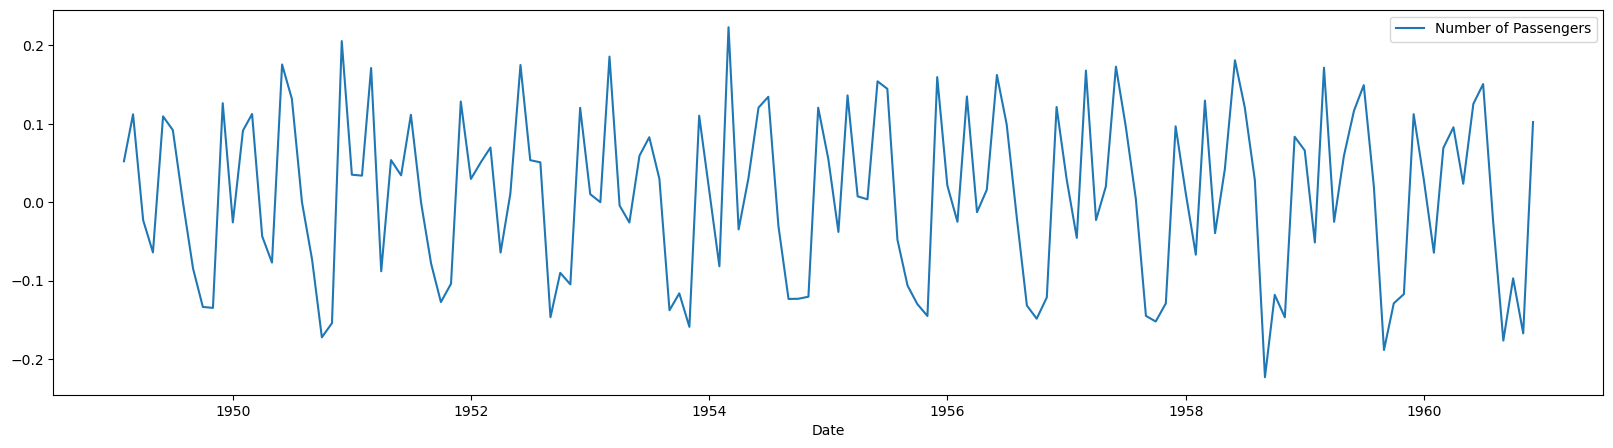

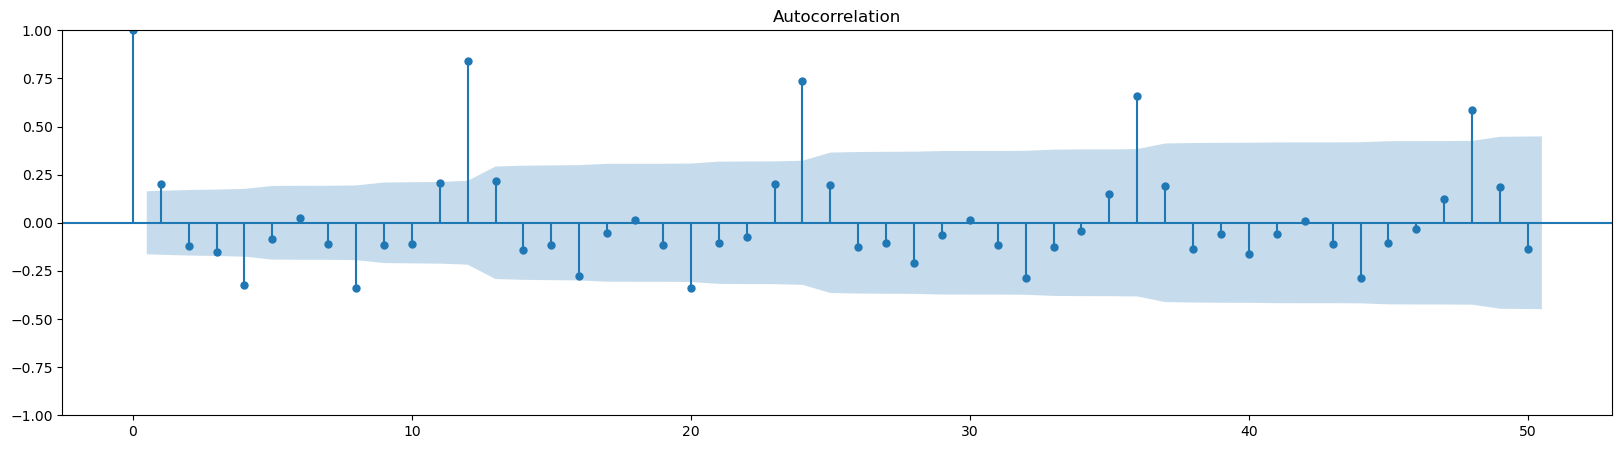

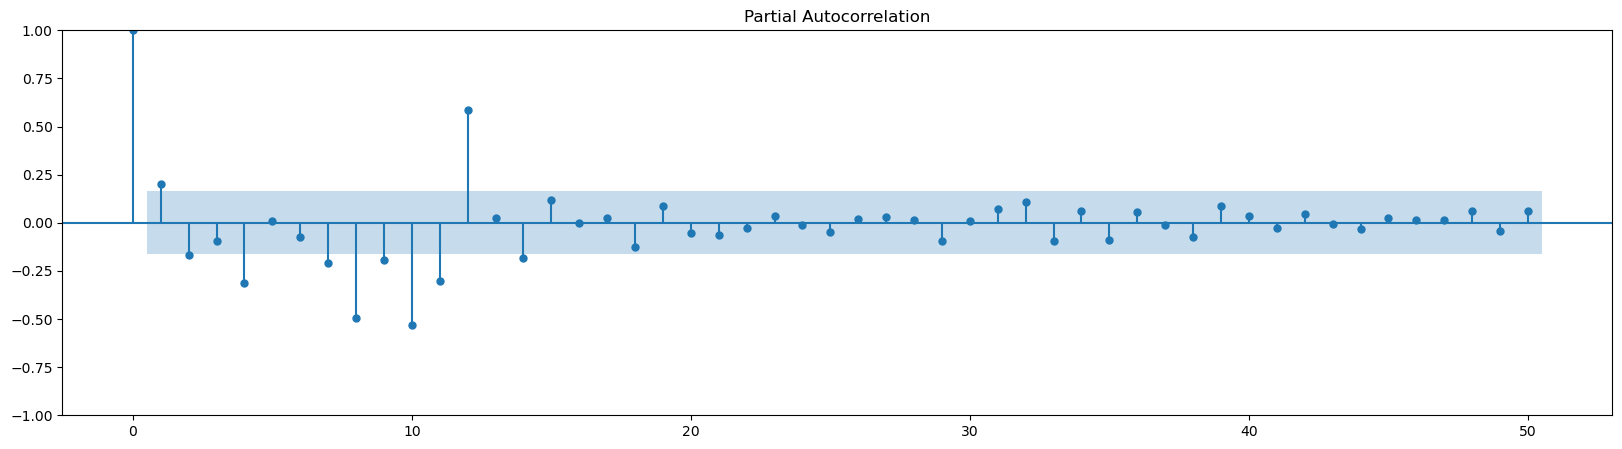

In [88]:
fig= plt.figure(figsize=(20,5))

sns.lineplot(differentiated_series)

acf= plot_acf(differentiated_series['Number of Passengers'],alpha = 0.05,lags = 50)
acf.set_size_inches((20,5))

pacf = plot_pacf(differentiated_series['Number of Passengers'],alpha =0.05, lags =50)
pacf.set_size_inches((20,5))

plt.show()

In [94]:
!pip install pmdarima

import pmdarima as pm
from pmdarima.model_selection import train_test_split
from copy import deepcopy
import numpy as np

model_df = deepcopy(data)
model_df.reset_index(inplace=True)

x = model_df['Date']
y = model_df['Number of Passengers']

train = model_df.iloc[:len(model_df)-12]['Number of Passengers']
test = model_df.iloc[len(model_df)-12:]['Number of Passengers']

model = pm.auto_arima(train, 
                    start_p = 1, 
                    start_q = 1,
                    max_p = 3, 
                    max_q = 3, 
                    m = 12,
                    start_P = 0, 
                    seasonal = True,
                    d = None, 
                    D = 1, 
                    trace = True,
                    error_action ='ignore',   
                    suppress_warnings = True,
                    stepwise = True
                ) 

print("-" * 25)
model.summary()

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 2.4 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.7 MB 2.2 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.7 MB 1.7 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.7 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 2.2 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=907.364, Time=0.73 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.46 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sat, 07 Jun 2025   AIC                            905.686
Time:                                    13:18:03   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Residuals auto-correlation (LB-test) --> 0.00 --> No autocorrelation (<= 0.05 then random walk, > 0.05 then white noise)

#### Jarque-Bera --> Prob(JB) = 0.24 > 0.05 --> H0 = normal dist -->  the distribution of the residuals are not deviating significatively from the normal distribution

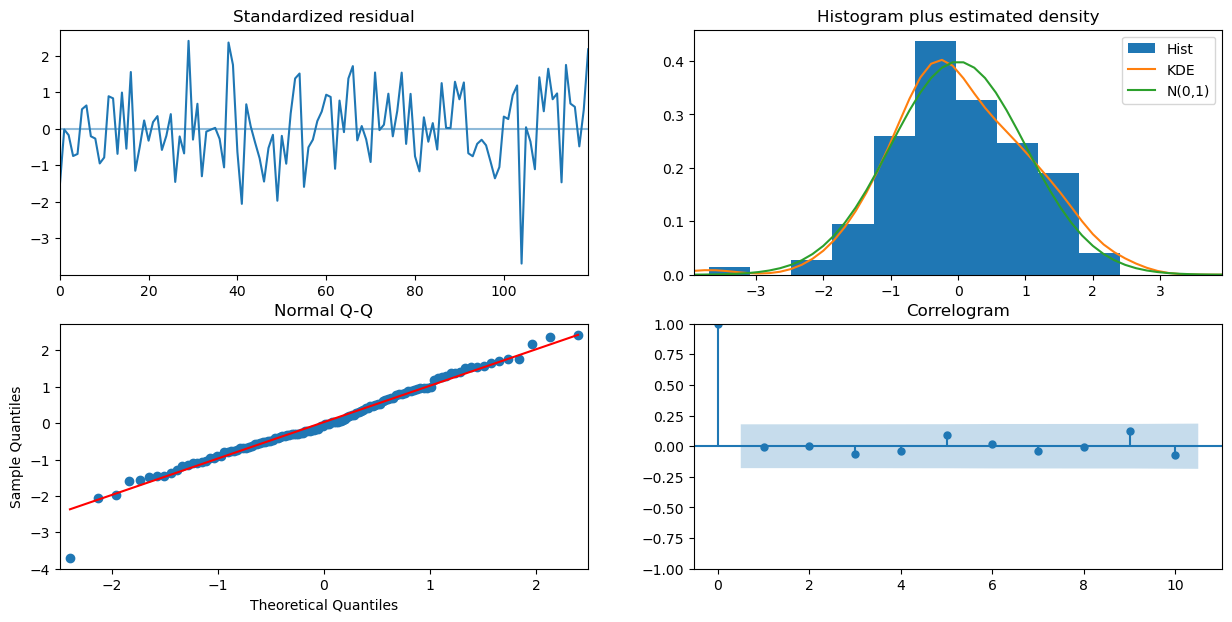

In [97]:
model.plot_diagnostics(figsize=(15,7))
plt.show()

#### The primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. In this case, our model diagnostics suggests that the model residuals are normally distributed

In [104]:
forecasts= model.predict(n_periods=test.shape[0]+60, return_conf_int=True)

confidence_interval_arima = pd.DataFrame(forecasts[1])
forecasted = forecasts[0]
lower_confidence_interval_arima = confidence_interval_arima.loc[:,0]
upper_confidence_interval_arima = confidence_interval_arima.loc[:,1]

## 

test_start_index = len(train)
start_date = x.iloc[test_start_index]
n_periods = len(test) +60
all_dates= pd.date_range(start=start_date,periods=n_periods, freq='MS')

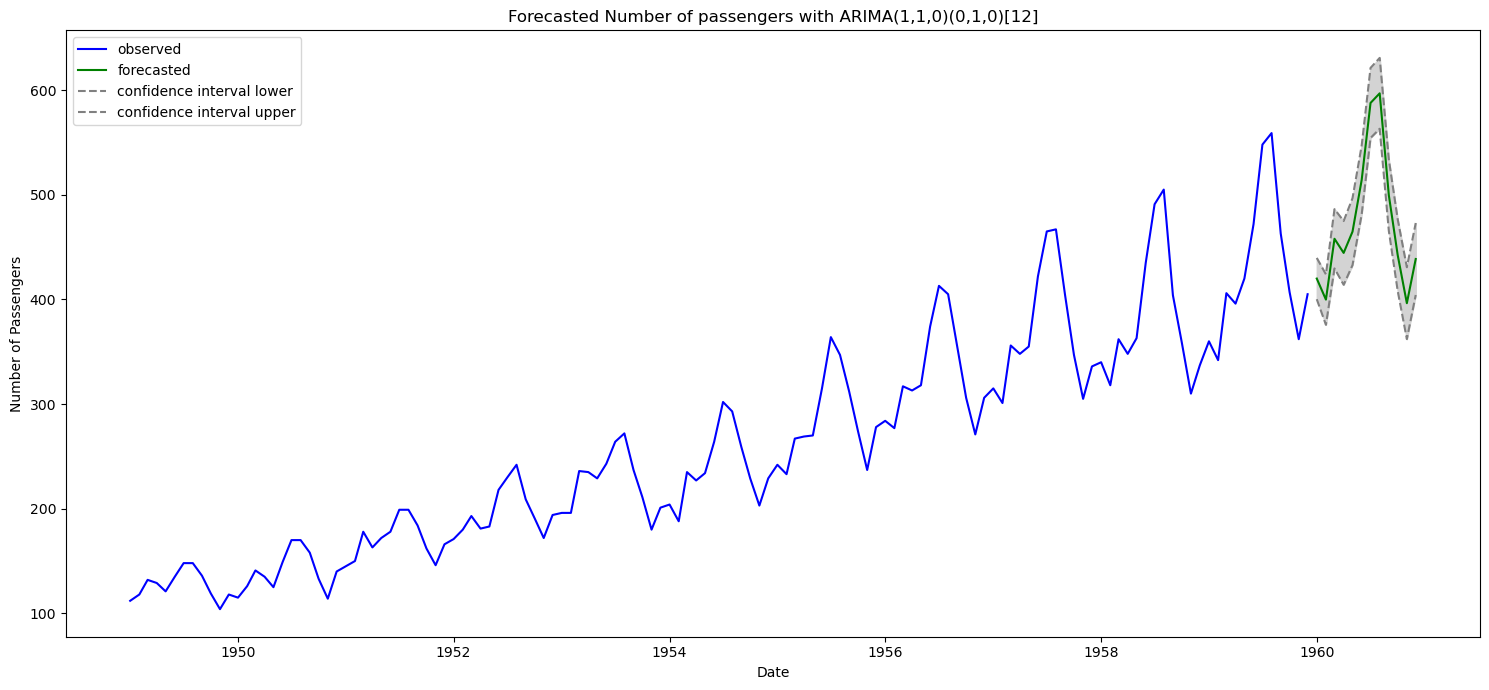

In [106]:
fig= plt.figure(figsize=(15,7))

plt.plot(x[:test_start_index],train, c='blue',label='observed')

plt.plot(x[test_start_index:], forecasted[:len(test)], c='green',label='forecasted')
plt.plot(x[test_start_index:],lower_confidence_interval_arima[:len(test)],c='grey',label='confidence interval lower',linestyle='dashed')
plt.plot(x[test_start_index:],upper_confidence_interval_arima[:len(test)],c='grey',label='confidence interval upper',linestyle='dashed')

plt.fill_between(x[test_start_index:], lower_confidence_interval_arima[:len(test)],  upper_confidence_interval_arima[:len(test)], color='lightgrey')
plt.title("Forecasted Number of passengers with ARIMA(1,1,0)(0,1,0)[12]")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.tight_layout()
plt.show()

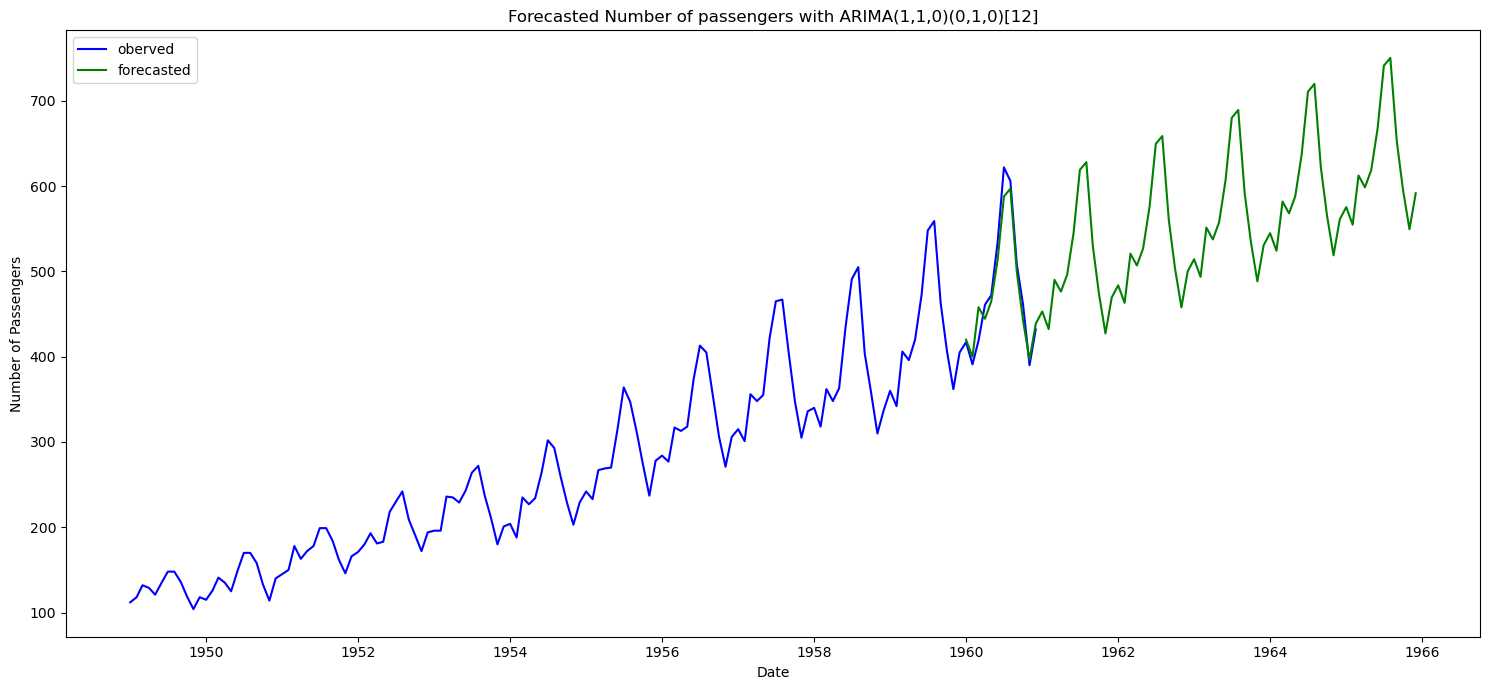

In [108]:
fig = plt.figure(figsize=(15,7))

plt.plot(x, y, c='blue', label='oberved')
plt.plot(all_dates, forecasted, c='green', label='forecasted')


plt.title("Forecasted Number of passengers with ARIMA(1,1,0)(0,1,0)[12]")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.tight_layout()
plt.show()

In [112]:
forecasted_table = pd.Series(forecasted.values,index=all_dates).reset_index()

predicted_values= forecasted_table[forecasted_table['index'] >='1961-01-01'].reset_index(drop=True).rename(columns={0:'Predicted Number of Passengers'})

predicted_values

,index,Predicted Number of Passengers
0,1961-01-01,453.007671
1,1961-02-01,432.400506
2,1961-03-01,490.151263
3,1961-04-01,476.315033
4,1961-05-01,496.376209
5,1961-06-01,545.508676
6,1961-07-01,619.023735
7,1961-08-01,628.098971
8,1961-09-01,530.513885
9,1961-10-01,473.257554
